In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '../../output/tests/gif/gif_stats.csv'
data = pd.read_csv(file_path)

# Display the first few rows and data info
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   prompt                            1944 non-null   object 
 1   num_frames                        1944 non-null   int64  
 2   batch_size                        1944 non-null   int64  
 3   guidance                          1944 non-null   float64
 4   ip_scale                          1944 non-null   float64
 5   multi_prompt_strategy             1944 non-null   object 
 6   intersection                      1944 non-null   object 
 7   clip                              1944 non-null   float64
 8   ms_ssim                           1944 non-null   float64
 9   lpips                             1944 non-null   float64
 10  temporal_consistency_loss         1944 non-null   float64
 11  temporal_consistency_loss_warp    1944 non-null   float64
 12  tempor

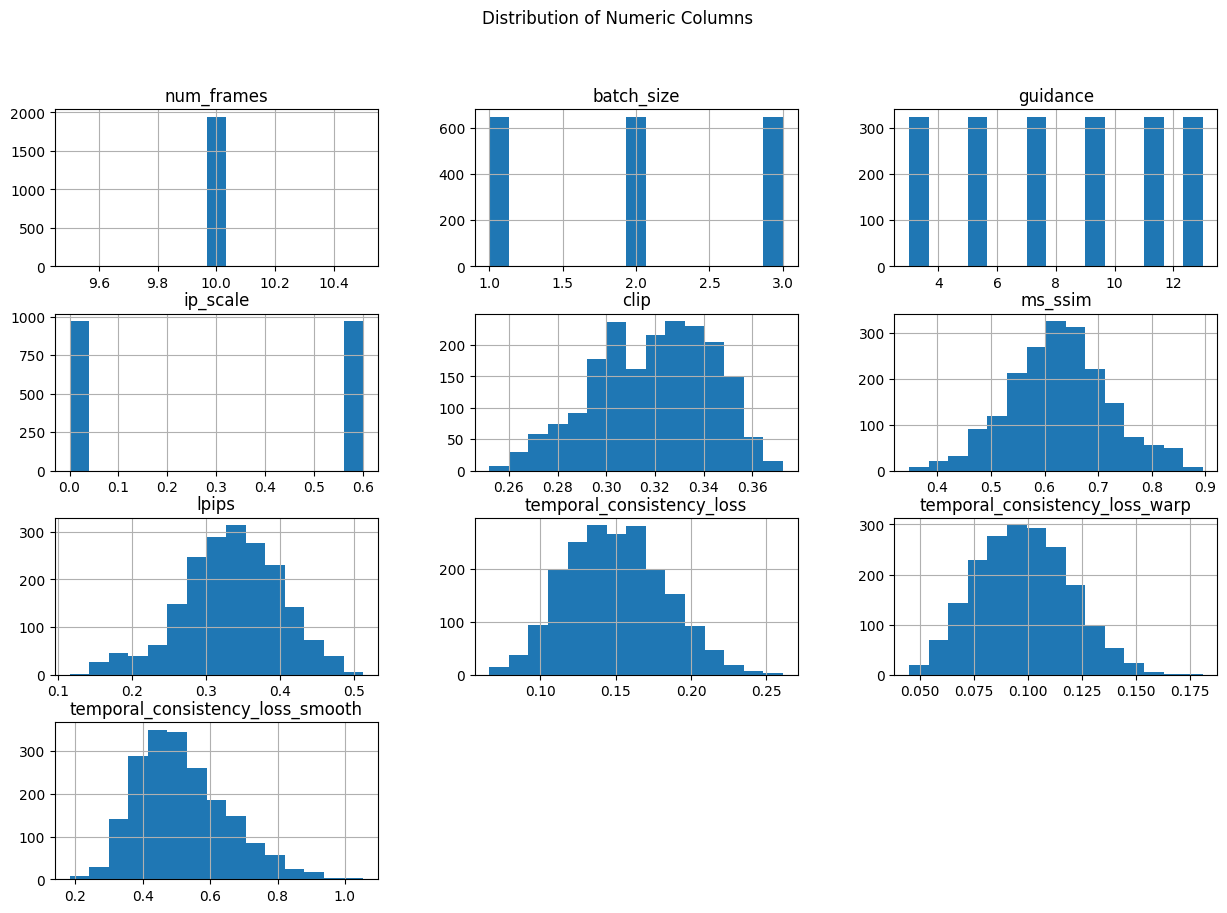

In [2]:
# Summary statistics
data.describe()

# Plot distributions of numeric columns
numeric_cols = ['num_frames', 'batch_size', 'guidance', 'ip_scale', 'clip', 'ms_ssim', 'lpips', 'temporal_consistency_loss', 'temporal_consistency_loss_warp', 'temporal_consistency_loss_smooth']
data[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Columns")
plt.show()

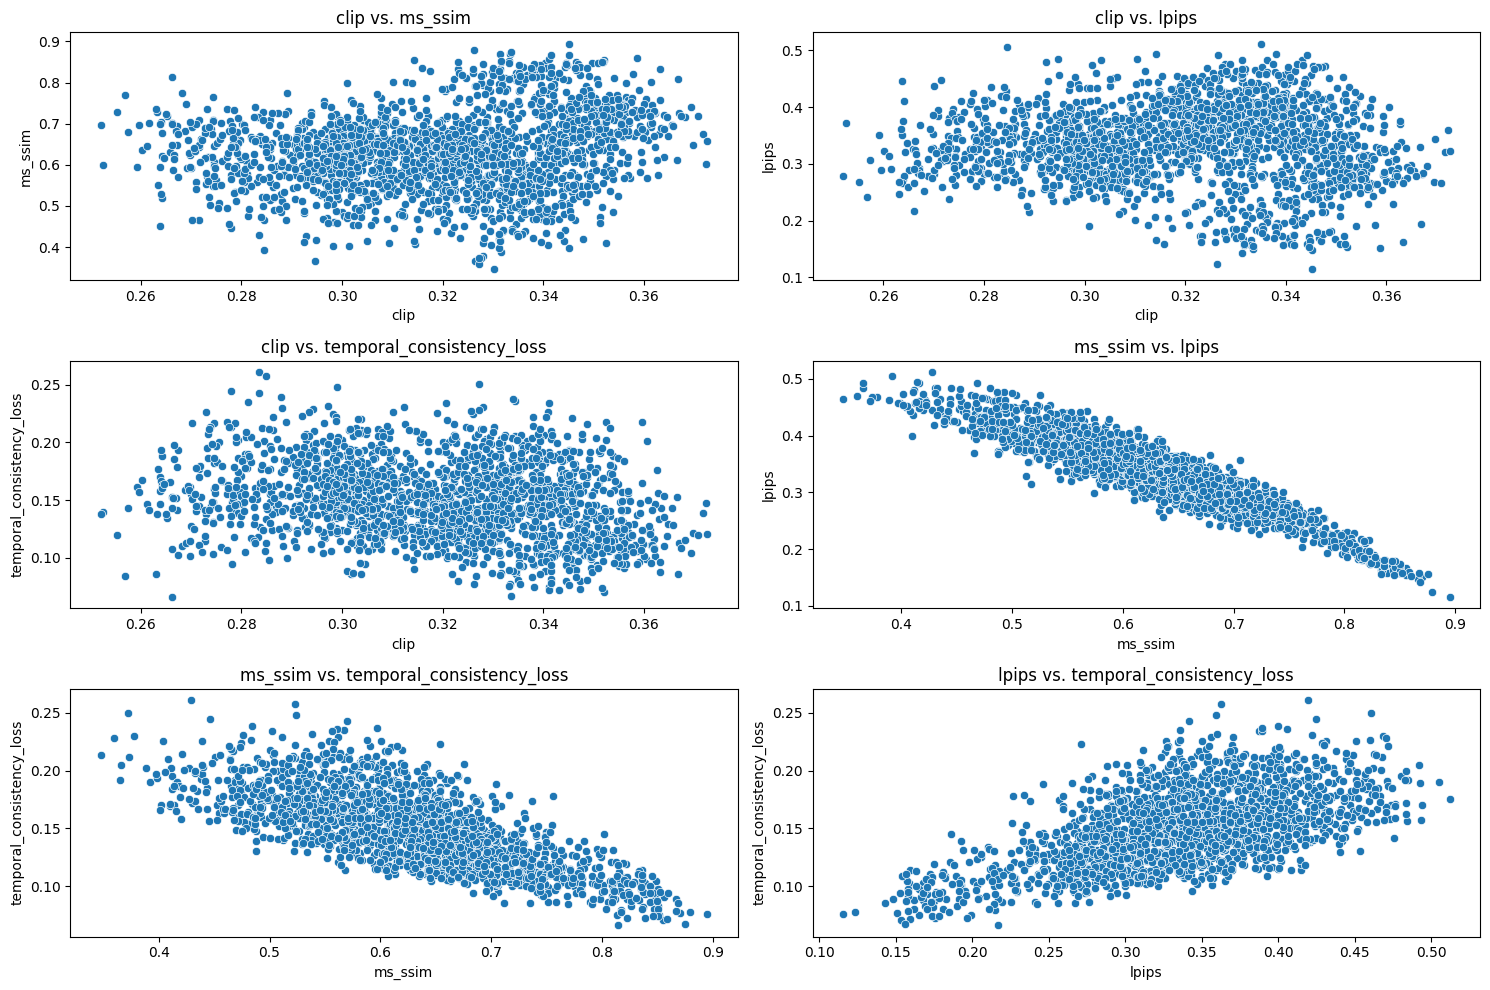

In [3]:
from itertools import combinations

# Generate all combinations of the four metrics
metrics = ['clip', 'ms_ssim', 'lpips', 'temporal_consistency_loss']
metric_combinations = list(combinations(metrics, 2))

# Plot each combination in a grid
plt.figure(figsize=(15, 10))
for i, (x, y) in enumerate(metric_combinations, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=data, x=x, y=y)
    plt.title(f"{x} vs. {y}")

plt.tight_layout()
plt.show()

	•	MS-SSIM: Aim for higher values.
	•	LPIPS: Aim for lower values.
	•	Temporal Consistency Loss: Aim for lower values.
	•	Clip: Optimal range depends on application, but typically aim for a balanced (moderate) value.

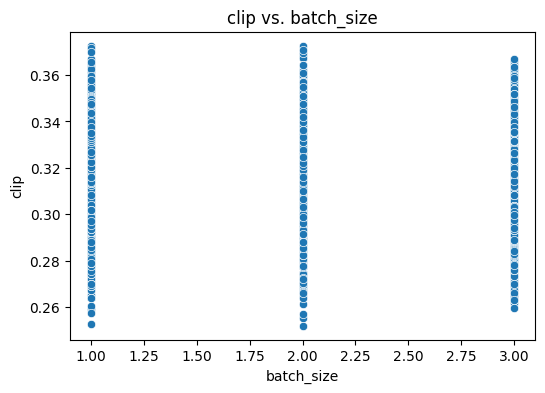

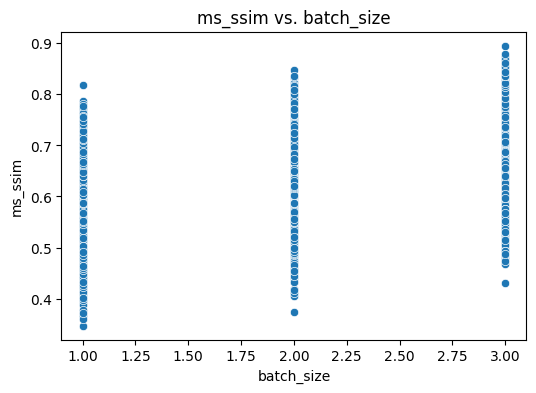

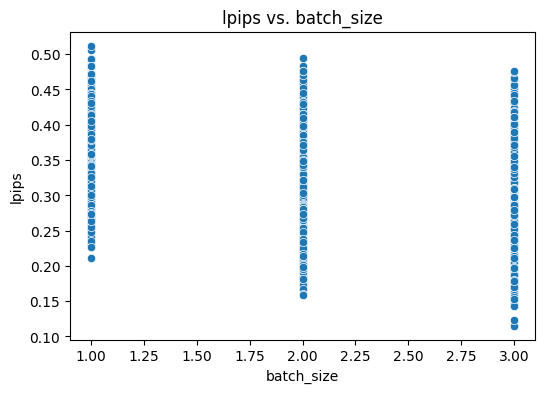

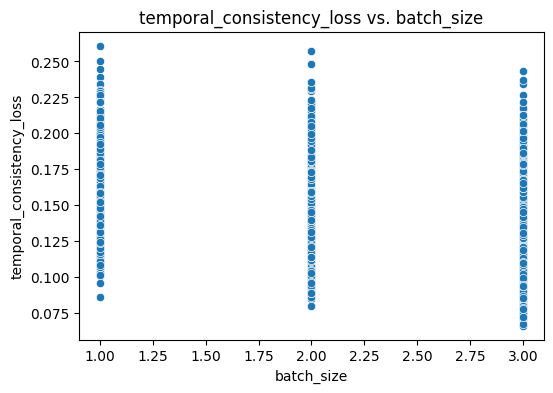

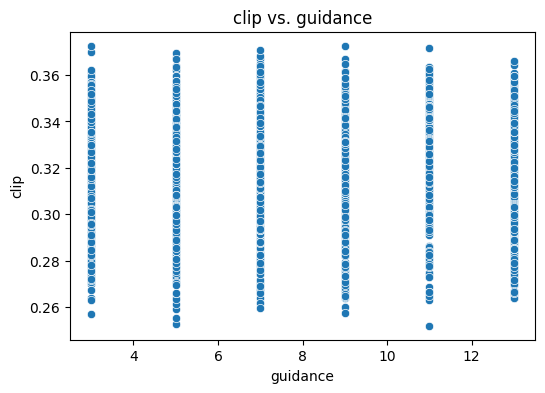

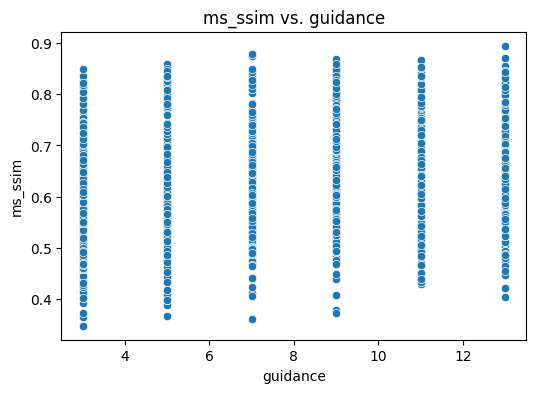

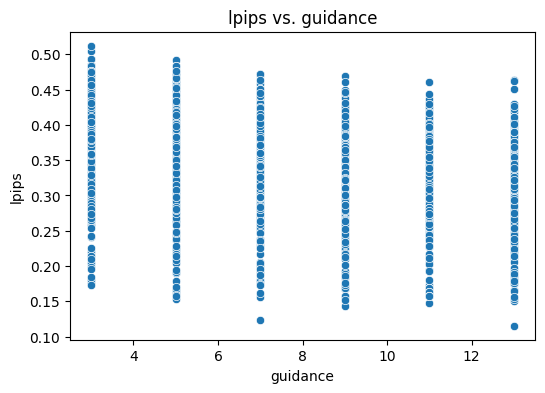

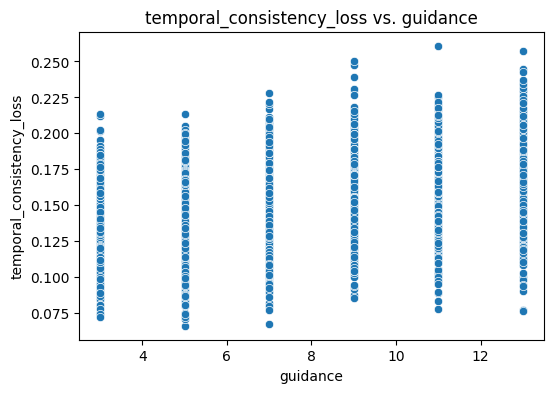

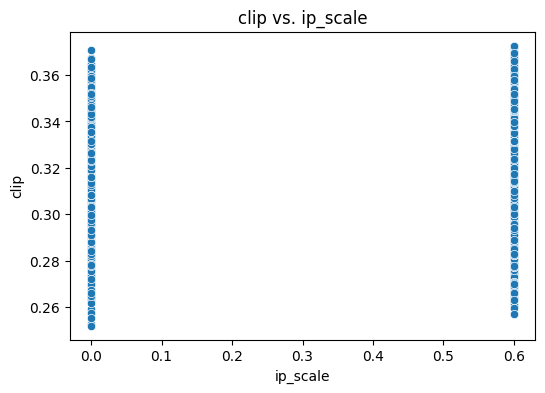

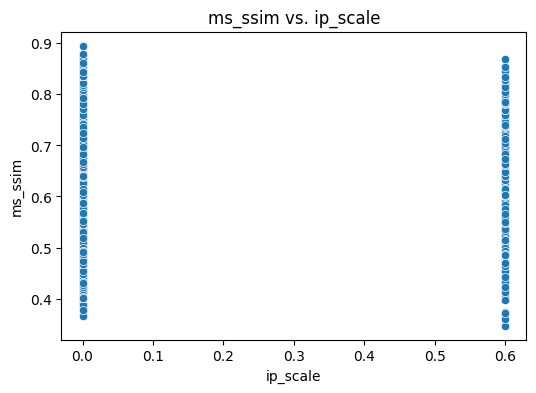

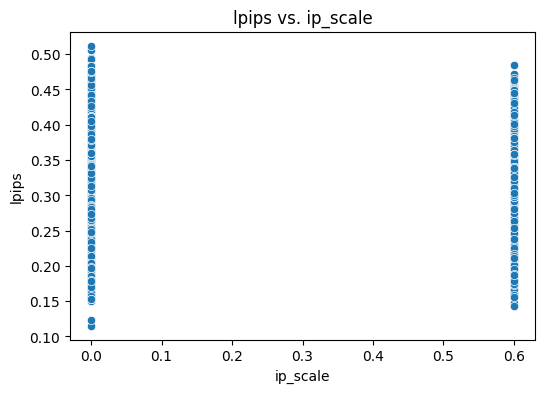

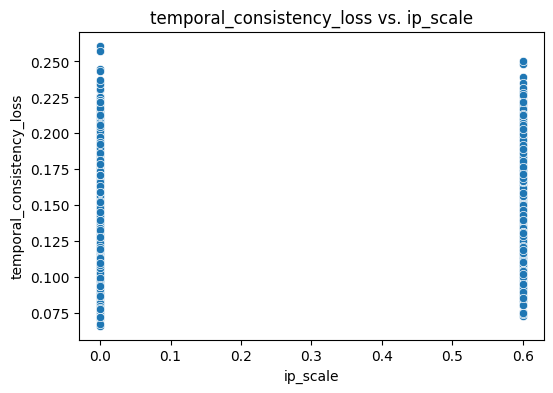

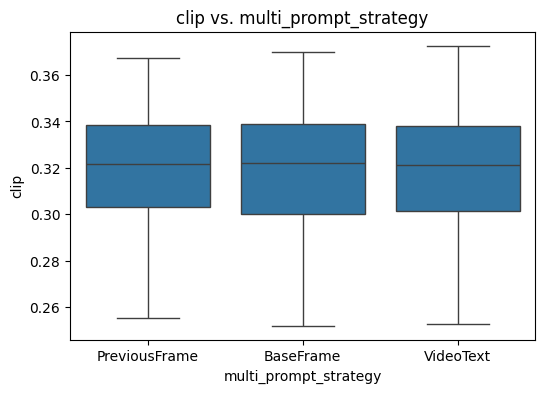

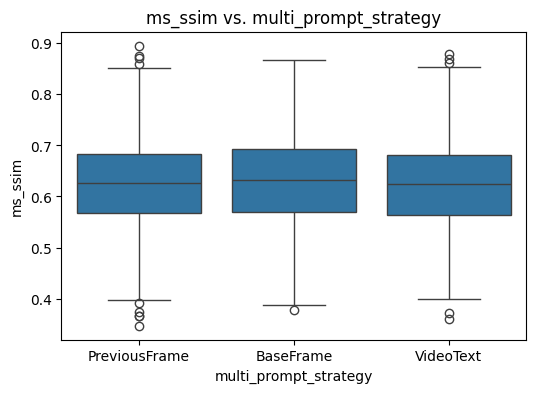

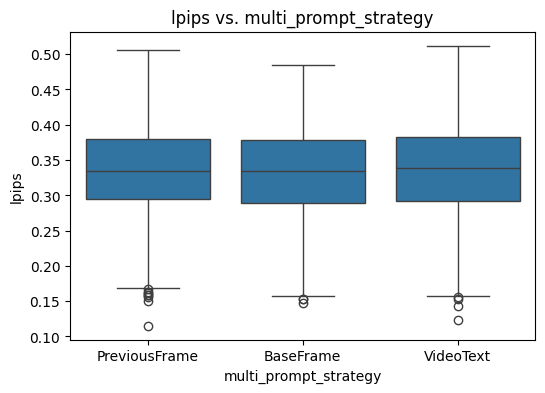

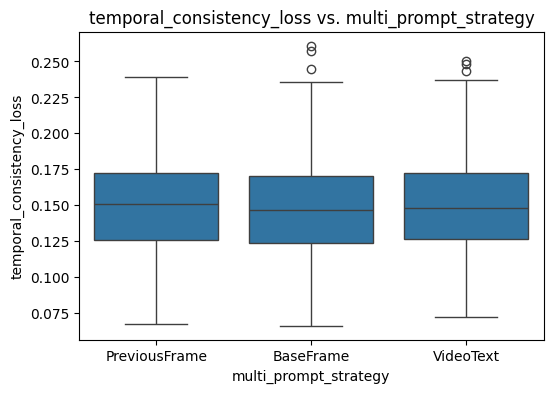

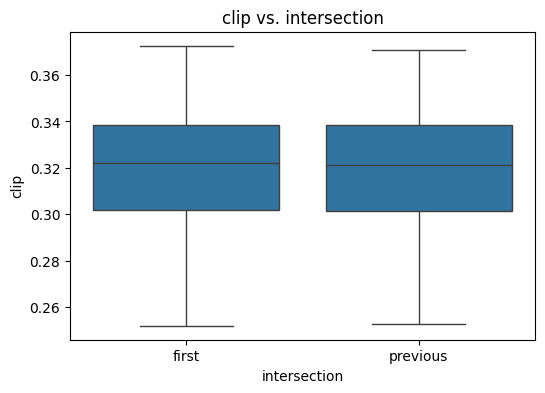

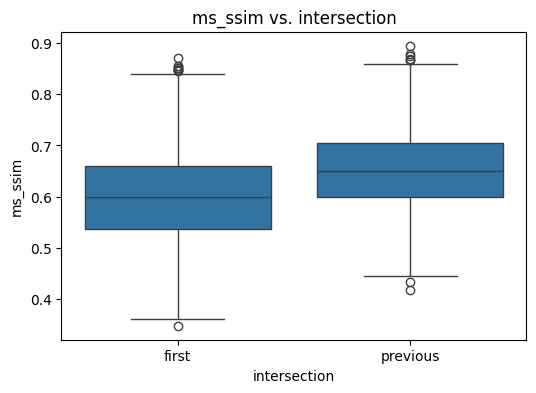

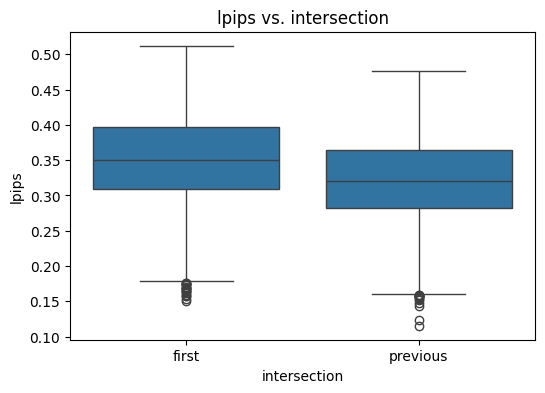

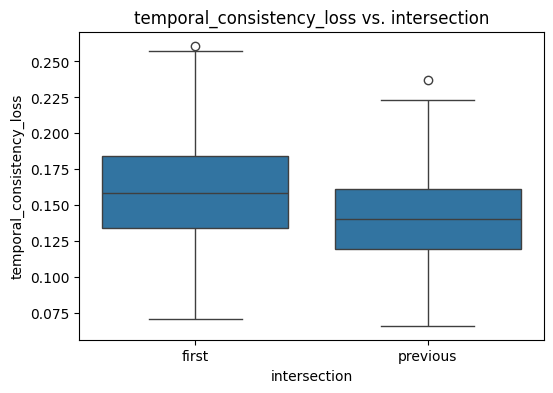

In [4]:
# List of parameters and metrics for plotting
params = ['batch_size', 'guidance', 'ip_scale', 'multi_prompt_strategy', 'intersection']
metrics = ['clip', 'ms_ssim', 'lpips', 'temporal_consistency_loss']

# Loop to create scatter plots for each parameter against each metric
for param in params:
    for metric in metrics:
        plt.figure(figsize=(6, 4))
        
        # Use different plotting for categorical vs. continuous variables
        if data[param].dtype == 'object':  # Categorical parameter
            sns.boxplot(data=data, x=param, y=metric)
        else:  # Continuous parameter
            sns.scatterplot(data=data, x=param, y=metric)
        
        plt.title(f"{metric} vs. {param}")
        plt.xlabel(param)
        plt.ylabel(metric)
        plt.show()

In [5]:
def analyze_top_configurations(data, top_x=10):
    # Step 1: Normalize each metric (0-1 scaling)
    data['ms_ssim_norm'] = 1 - ((data['ms_ssim'] - data['ms_ssim'].min()) / (data['ms_ssim'].max() - data['ms_ssim'].min()))
    data['lpips_norm'] = (data['lpips'] - data['lpips'].min()) / (data['lpips'].max() - data['lpips'].min())
    data['temporal_consistency_loss_norm'] = (data['temporal_consistency_loss'] - data['temporal_consistency_loss'].min()) / (data['temporal_consistency_loss'].max() - data['temporal_consistency_loss'].min())
    
    # Step 2: Compute combined normalized loss
    data['combined_loss'] = data['ms_ssim_norm'] + data['lpips_norm'] + data['temporal_consistency_loss_norm']
    
    # Step 3: Sort and find top X configurations per prompt
    top_per_prompt = data.sort_values(by=['prompt', 'combined_loss']).groupby('prompt').head(top_x)
    
    # Step 4: Find the most frequent value for each parameter
    most_frequent_params = {}
    for param in ['num_frames', 'batch_size', 'guidance', 'ip_scale', 'multi_prompt_strategy', 'intersection']:
        most_frequent_params[param] = top_per_prompt[param].mode().iloc[0]

    # Step 5: Create and return the hyperparams dict with the highest frequency values
    hyperparams = {
        'num_frames': most_frequent_params['num_frames'],
        'batch_size': most_frequent_params['batch_size'],
        'guidance': most_frequent_params['guidance'],
        'ip_scale': most_frequent_params['ip_scale'],
        'multi_prompt_strategy': most_frequent_params['multi_prompt_strategy'],
        'intersection': most_frequent_params['intersection']
    }
    
    return hyperparams

In [9]:
print(analyze_top_configurations(data, top_x=1))
print(analyze_top_configurations(data, top_x=2))
print(analyze_top_configurations(data, top_x=3))
print(analyze_top_configurations(data, top_x=4))
print(analyze_top_configurations(data, top_x=5))
print(analyze_top_configurations(data, top_x=10))
print(analyze_top_configurations(data, top_x=20))
print(analyze_top_configurations(data, top_x=50))
print(analyze_top_configurations(data, top_x=100))

{'num_frames': 10, 'batch_size': 3, 'guidance': 5.0, 'ip_scale': 0.6, 'multi_prompt_strategy': 'PreviousFrame', 'intersection': 'previous'}
{'num_frames': 10, 'batch_size': 3, 'guidance': 5.0, 'ip_scale': 0.6, 'multi_prompt_strategy': 'VideoText', 'intersection': 'previous'}
{'num_frames': 10, 'batch_size': 3, 'guidance': 11.0, 'ip_scale': 0.6, 'multi_prompt_strategy': 'VideoText', 'intersection': 'previous'}
{'num_frames': 10, 'batch_size': 3, 'guidance': 11.0, 'ip_scale': 0.6, 'multi_prompt_strategy': 'VideoText', 'intersection': 'previous'}
{'num_frames': 10, 'batch_size': 3, 'guidance': 5.0, 'ip_scale': 0.6, 'multi_prompt_strategy': 'VideoText', 'intersection': 'previous'}
{'num_frames': 10, 'batch_size': 3, 'guidance': 11.0, 'ip_scale': 0.6, 'multi_prompt_strategy': 'PreviousFrame', 'intersection': 'previous'}
{'num_frames': 10, 'batch_size': 3, 'guidance': 11.0, 'ip_scale': 0.6, 'multi_prompt_strategy': 'BaseFrame', 'intersection': 'previous'}
{'num_frames': 10, 'batch_size': 3, 